<a href="https://colab.research.google.com/github/parkjlearning/BrainTumorSegmentation/blob/master/compare_U_Net_FC_DenseNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the drive
from google.colab import drive 
drive.mount('/content/drive')
# Define paths to data
filepath = '/content/drive/My Drive/Colab_data/BraTS2020/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
with open(os.path.join(filepath, "model_eval_results_U-net_128x128.pickle"), 'rb') as f: 
     unet_eval = pickle.load(f)
df_unet_0 = pd.DataFrame.from_dict(unet_eval, orient='index').reset_index().rename(columns={"index":"metrics", 0:"Values"}) 
unet_eval['model'] = 'U-Net'
df_unet_1 = pd.DataFrame(unet_eval, index=[0])

In [ ]:
def change_barwidth(ax, fraction) :
    for patch in ax.patches :
        current_width = patch.get_width()
        new_value = current_width * fraction
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


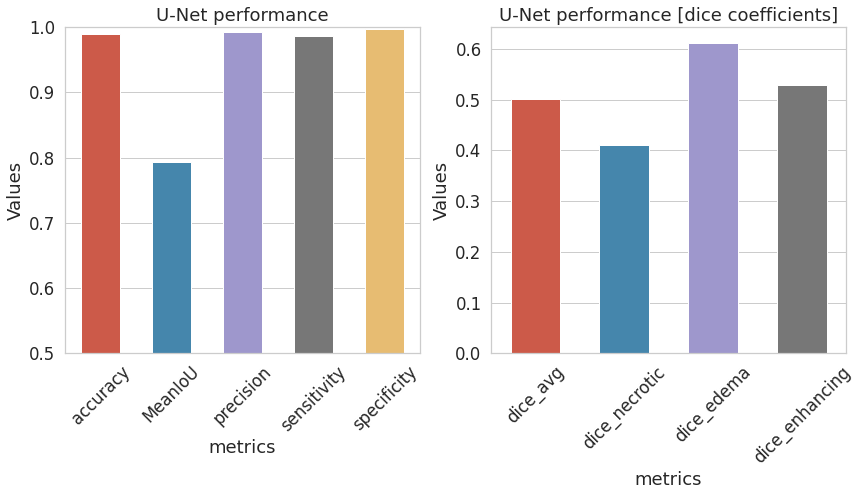

In [ ]:
df_unet_gross_met = df_unet_0.loc[df_unet_0['metrics'].isin(['accuracy', 'precision', 'sensitivity', 'specificity', 'MeanIoU'])]
df_unet_dice = df_unet_0.loc[df_unet_0['metrics'].isin(['dice_coef', 'dice_coef_necrotic', 'dice_coef_edema', 'dice_coef_enhancing']), :]
df_unet_dice.metrics = ["dice_avg", "dice_necrotic", "dice_edema", "dice_enhancing"]

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.barplot(x="metrics", y="Values", data=df_unet_gross_met, ax=ax[0])
sns.barplot(x="metrics", y="Values", data=df_unet_dice, ax=ax[1])
ax[0].set_ylim(bottom=0.5, top=1.0)
ax[0].set_title("U-Net performance")
ax[0].set_xticklabels(df_unet_gross_met.metrics, rotation=45)
ax[1].set_title("U-Net performance [dice coefficients]")
ax[1].set_xticklabels(df_unet_dice.metrics, rotation=45)

change_barwidth(ax[0], .7)
change_barwidth(ax[1], .7)
plt.show()

In [ ]:
with open(os.path.join(filepath, "model_eval_results_FC_DenseNets_64x64.pickle"), 'rb') as f: 
     fcDenseNet_eval = pickle.load(f)
fcDenseNet_eval['model'] = 'FC-DenseNet'
df_fcDenseNet = pd.DataFrame(fcDenseNet_eval, index=[0])

In [ ]:
df = pd.concat([df_unet_1, df_fcDenseNet],axis=0)

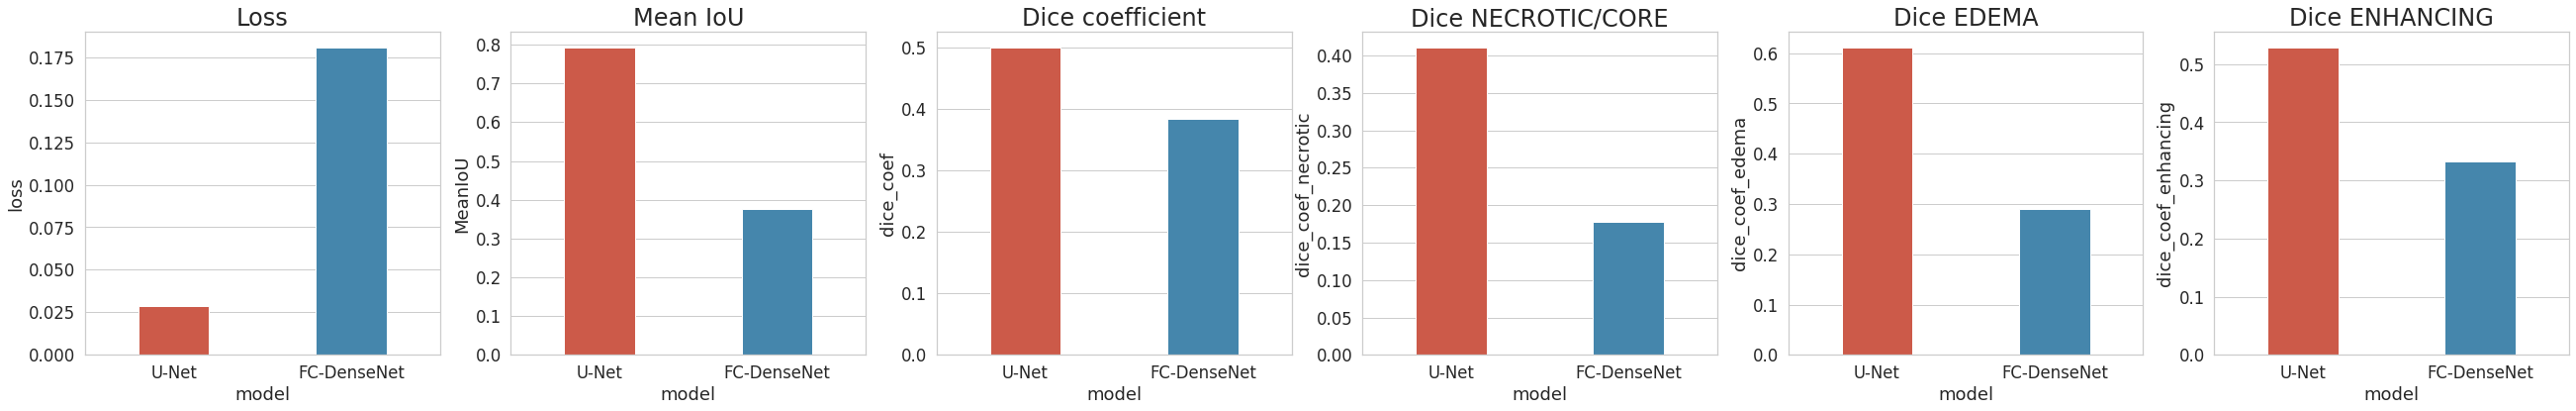

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(45, 6))
sns.barplot(x="model", y="loss", data=df, ax=axes[0])
sns.barplot(x="model", y="MeanIoU", data=df, ax=axes[1])
sns.barplot(x="model", y="dice_coef", data=df, ax=axes[2])
sns.barplot(x="model", y="dice_coef_necrotic", data=df, ax=axes[3])
sns.barplot(x="model", y="dice_coef_edema", data=df, ax=axes[4])
sns.barplot(x="model", y="dice_coef_enhancing", data=df, ax=axes[5])

axes[0].set_title("Loss", fontsize=24)
axes[1].set_title("Mean IoU", fontsize=24)
axes[2].set_title("Dice coefficient", fontsize=24)
axes[3].set_title("Dice NECROTIC/CORE", fontsize=24)
axes[4].set_title("Dice EDEMA", fontsize=24)
axes[5].set_title("Dice ENHANCING", fontsize=24)

change_barwidth(axes[0], .5)
change_barwidth(axes[1], .5)
change_barwidth(axes[2], .5)
change_barwidth(axes[3], .5)
change_barwidth(axes[4], .5)
change_barwidth(axes[5], .5)

plt.show()

In [ ]:
df_unet.plot(x='model', y=['accuracy', 'precision', 'sensitivity', 'specificity'], kind='bar')

,loss,accuracy,MeanIoU,dice_coef,precision,sensitivity,specificity,dice_coef_necrotic,dice_coef_edema,dice_coef_enhancing,model
0,0.028447,0.990166,0.793503,0.501006,0.992848,0.986843,0.997527,0.4109,0.611902,0.529176,U-Net
